In [1]:
def read_contact_dataset(file_name):
    
    contact = []
    signals = []
    contactless = []
    peaks = []
    with open(file_name, 'r') as csvfile:
        reader = csv.reader(csvfile, delimiter = ',', quoting = csv.QUOTE_NONNUMERIC)
        i = 0
        for signal in reader:
            contactless = contact
            contact = peaks
            peaks = signal
            i += 1
            if (i % 3) < 1:
                contact = contact / (np.max(contact)-np.min(contact))
                contactless = contactless / (np.max(contactless)-np.min(contactless))
                for j in range(7,len(peaks)-7):
                    if peaks[j]>0.9:
                        peaks[j-1] = 0.85
                        peaks[j-2] = 0.8
                        peaks[j-3] = 0.7
                        peaks[j-4] = 0.6
                        peaks[j-5] = 0.5
                        peaks[j-6] = 0.3
                        peaks[j-7] = 0.1
                        peaks[j+1] = 0.85
                        peaks[j+2] = 0.8
                        peaks[j+3] = 0.7
                        peaks[j+4] = 0.6
                        peaks[j+5] = 0.5
                        peaks[j+6] = 0.3
                        peaks[j+7] = 0.1
                signals.append((np.asarray(contactless), 
                                np.asarray(contact),
                                np.asarray(peaks)))   

    return signals

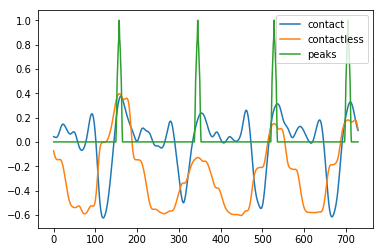

In [5]:
from matplotlib import pyplot as plt
import csv
import numpy as np
signals = read_contact_dataset('dataset_contact.csv')
plt.plot(signals[1][0], label='contact')
plt.plot(signals[1][1], label='contactless')
plt.plot(signals[1][2], label='peaks')
plt.legend()